In [1]:
from deepface import DeepFace
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.image as mpimg
import os

In [3]:
image1 = r"user1.jpg"
image2 = r"user2.jpg"

result = DeepFace.verify(img1_path = image1,
                        img2_path = image2)

result

{'verified': False,
 'distance': 0.9395309540323099,
 'threshold': 0.68,
 'model': 'VGG-Face',
 'detector_backend': 'opencv',
 'similarity_metric': 'cosine',
 'facial_areas': {'img1': {'x': 676,
   'y': 519,
   'w': 109,
   'h': 109,
   'left_eye': None,
   'right_eye': None},
  'img2': {'x': 253,
   'y': 400,
   'w': 83,
   'h': 83,
   'left_eye': (307, 433),
   'right_eye': (281, 433)}},
 'time': 9.98}

In [4]:
image3 = r"user2.jpg"
image4 = r"user3.jfif"

result = DeepFace.verify(img1_path = image3,
                        img2_path = image4)
result

{'verified': True,
 'distance': 0.5409959625915752,
 'threshold': 0.68,
 'model': 'VGG-Face',
 'detector_backend': 'opencv',
 'similarity_metric': 'cosine',
 'facial_areas': {'img1': {'x': 253,
   'y': 400,
   'w': 83,
   'h': 83,
   'left_eye': (307, 433),
   'right_eye': (281, 433)},
  'img2': {'x': 64,
   'y': 106,
   'w': 61,
   'h': 61,
   'left_eye': None,
   'right_eye': None}},
 'time': 1.43}

In [5]:
image5 = r"user1.jpg"
image6 = r"user3.webp"

result = DeepFace.verify(img1_path = image5,
                        img2_path = image6)
result

{'verified': True,
 'distance': 0.4651111570629185,
 'threshold': 0.68,
 'model': 'VGG-Face',
 'detector_backend': 'opencv',
 'similarity_metric': 'cosine',
 'facial_areas': {'img1': {'x': 520,
   'y': 164,
   'w': 234,
   'h': 234,
   'left_eye': (683, 234),
   'right_eye': (589, 269)},
  'img2': {'x': 224,
   'y': 95,
   'w': 79,
   'h': 79,
   'left_eye': None,
   'right_eye': None}},
 'time': 3.37}

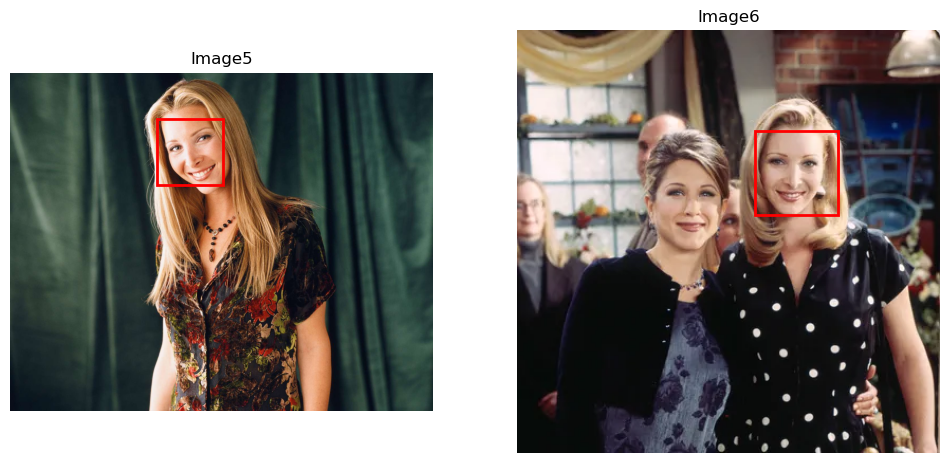

In [ ]:
image5 = mpimg.imread(image5)
image6 = mpimg.imread(image6)

facial_areas = result["facial_areas"]

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].imshow(image5)
rect1 = patches.Rectangle(
    (facial_areas['img1']['x'], facial_areas['img1']['y']),
    facial_areas['img1']['w'],
    facial_areas['img1']['h'],
    linewidth=2,
    edgecolor='r',
    facecolor='none'
)
axs[0].add_patch(rect1)
axs[0].set_title('Image5')
axs[0].axis('off')

axs[1].imshow(image6)
rect2 = patches.Rectangle(
    (facial_areas['img2']['x'],
    facial_areas['img2']['y']),
    facial_areas['img2']['w'],
    facial_areas['img2']['h'],
    linewidth=2,
    edgecolor='r',
    facecolor='none'
)
axs[1].add_patch(rect2)
axs[1].set_title('Image6')
axs[1].axis('off')

plt.show()

In [21]:
results = DeepFace.find(img_path = "user1.jpg",
                    db_path = "C:/Users/NIKKI RANI/Downloads/SovereignT/images/")


results[0].head()

24-11-23 19:21:07 - Found 5 newly added image(s), 0 removed image(s), 0 replaced image(s).


Finding representations: 100%|██████████| 5/5 [00:05<00:00,  1.19s/it]


24-11-23 19:21:13 - There are now 6 representations in ds_model_vggface_detector_opencv_aligned_normalization_base_expand_0.pkl
24-11-23 19:21:13 - Searching user1.jpg in 6 length datastore
24-11-23 19:21:15 - find function duration 8.070331573486328 seconds


,identity,hash,target_x,target_y,target_w,target_h,source_x,source_y,source_w,source_h,threshold,distance
0,C:/Users/NIKKI RANI/Downloads/SovereignT/image...,d40c222437c812fd19a531851762197eca2f1907,520,164,234,234,520,164,234,234,0.68,-2.220446e-16


In [24]:
embedding_objs = DeepFace.represent(img_path = "user1.jpg")

embedding_objs[0].keys()

dict_keys(['embedding', 'facial_area', 'face_confidence'])

In [25]:
print(len(embedding_objs[0]["embedding"]))

4096


In [26]:
models = [
"VGG-Face",
"Facenet",
"Facenet512",
"OpenFace",
"DeepFace",
"DeepID",
"ArcFace",
"Dlib",
"SFace",
]

metrics = ["cosine", "euclidean", "euclidean_l2"]

In [35]:
image5 = r"user1.jpg"
image6 = r"user3.webp"

In [36]:
result = DeepFace.verify(img1_path = image5,
                        img2_path = image6,
                        model_name = "Facenet512",
                        distance_metric="euclidean",)

result

{'verified': True,
 'distance': 14.544082730071112,
 'threshold': 23.56,
 'model': 'Facenet512',
 'detector_backend': 'opencv',
 'similarity_metric': 'euclidean',
 'facial_areas': {'img1': {'x': 520,
   'y': 164,
   'w': 234,
   'h': 234,
   'left_eye': (683, 234),
   'right_eye': (589, 269)},
  'img2': {'x': 224,
   'y': 95,
   'w': 79,
   'h': 79,
   'left_eye': None,
   'right_eye': None}},
 'time': 2.68}

In [40]:
import pandas as pd

In [ ]:
results = []

for model in models:
    for metric in metrics:
        try:
            # Perform verification
            result = DeepFace.verify(
                img1_path=image5,
                img2_path=image6,
                model_name=model,
                distance_metric=metric,
            )
            results.append({
                "Model": model,
                "Metric": metric,
                "Verified": result["verified"],
                "Distance": result["distance"],
                "Threshold": result["threshold"],
            })
        except Exception as e:
            results.append({
                "Model": model,
                "Metric": metric,
                "Verified": "Error",
                "Distance": "Error",
                "Threshold": "Error",
                "Error": str(e),
            })

# Create a DataFrame
df = pd.DataFrame(results)

print(df.to_string(index=False))

df.to_csv("verification_results.csv", index=False)

24-11-23 19:33:37 - deepid_keras_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/deepid_keras_weights.h5
To: C:\Users\NIKKI RANI\.deepface\weights\deepid_keras_weights.h5
100%|██████████| 1.61M/1.61M [00:01<00:00, 1.14MB/s]


24-11-23 19:33:45 - arcface_weights.h5 will be downloaded to C:\Users\NIKKI RANI\.deepface/weights\arcface_weights.h5


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/arcface_weights.h5
To: C:\Users\NIKKI RANI\.deepface\weights\arcface_weights.h5
100%|██████████| 137M/137M [01:36<00:00, 1.42MB/s]


24-11-23 19:35:32 - dlib_face_recognition_resnet_model_v1.dat is going to be downloaded


Downloading...
From: http://dlib.net/files/dlib_face_recognition_resnet_model_v1.dat.bz2
To: C:\Users\NIKKI RANI\.deepface\weights\dlib_face_recognition_resnet_model_v1.dat.bz2
21.4MB [00:17, 1.20MB/s]


24-11-23 19:36:00 - face_recognition_sface_2021dec.onnx weights will be downloaded...


Downloading...
From: https://github.com/opencv/opencv_zoo/raw/main/models/face_recognition_sface/face_recognition_sface_2021dec.onnx
To: C:\Users\NIKKI RANI\.deepface\weights\face_recognition_sface_2021dec.onnx
100%|██████████| 38.7M/38.7M [00:23<00:00, 1.64MB/s]


     Model       Metric Verified   Distance Threshold                                                                                                                                    Error
  VGG-Face       cosine     True   0.465111      0.68                                                                                                                                      NaN
  VGG-Face    euclidean     True    0.96448      1.17                                                                                                                                      NaN
  VGG-Face euclidean_l2     True    0.96448      1.17                                                                                                                                      NaN
   Facenet       cosine     True   0.210327       0.4                                                                                                                                      NaN
   Facenet    euclidean     True   8.117465  

In [ ]:
from deepface import DeepFace

arcface_model = DeepFace.build_model("ArcFace")
facenet_model = DeepFace.build_model("Facenet")

img_path = "user1.jpg"

arcface_embedding = DeepFace.represent(img_path = img_path, model_name = "ArcFace")
facenet_embedding = DeepFace.represent(img_path = img_path, model_name = "Facenet")

arcface_vector = arcface_embedding[0]['embedding']
facenet_vector = facenet_embedding[0]['embedding']

print(f"ArcFace embedding dimension: {arcface_dimension}")
print(f"Facenet embedding dimension: {facenet_dimension}")


ArcFace embedding dimension: 512
Facenet embedding dimension: 128


In [9]:
print(f"ArcFace Embedding (512-dimensional vector):\n{arcface_vector}\n")
print(f"Facenet Embedding (128-dimensional vector):\n{facenet_vector}\n")

ArcFace Embedding (512-dimensional vector):
[-0.1457330882549286, 0.35611051321029663, 0.10980375111103058, 0.3882080018520355, -0.2140892744064331, 0.14353685081005096, -0.06961032748222351, 0.1264014095067978, -0.18785801529884338, 0.21739773452281952, 0.13702000677585602, 0.3222678005695343, 0.08930055052042007, -0.191853329539299, 0.21441486477851868, -0.21121037006378174, 0.0249129980802536, -0.12486153095960617, 0.05302073806524277, -0.35449567437171936, 0.07939522713422775, -0.1696966290473938, -0.08593477308750153, 0.060452502220869064, 0.4312802851200104, -0.08301730453968048, 0.35727059841156006, -0.018286429345607758, 0.5499926209449768, -0.6853067874908447, -0.15104413032531738, -0.2603738009929657, -0.12007594853639603, -0.16394226253032684, -0.1315547227859497, 0.31602197885513306, -0.0535639151930809, 0.34059011936187744, 0.1293840855360031, 0.08271143585443497, 0.20886649191379547, 0.1972677856683731, -0.20802344381809235, -0.13362735509872437, 0.18896526098251343, -0.1

In [ ]:
import cv2
from deepface import DeepFace

face_analysis = DeepFace.analyze(img_path=img_path, actions=['gender', 'age'], enforce_detection=True)

print(face_analysis)

if 'region' in face_analysis[0]:
    region = face_analysis[0]['region']
    x, y, w, h = region['x'], region['y'], region['w'], region['h']
    print(f"Face coordinates: x={x}, y={y}, w={w}, h={h}")

    img = cv2.imread(img_path)
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

    cv2.imshow("Face Detected", img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
else:
    print("No face region detected!")


Action: age: 100%|██████████| 2/2 [00:01<00:00,  1.46it/s]   


[{'gender': {'Woman': 100.0, 'Man': 1.670084692761975e-06}, 'dominant_gender': 'Woman', 'region': {'x': 520, 'y': 164, 'w': 234, 'h': 234, 'left_eye': (683, 234), 'right_eye': (589, 269)}, 'face_confidence': 0.95, 'age': 30}, {'gender': {'Woman': 4.580633714795113, 'Man': 95.41935920715332}, 'dominant_gender': 'Man', 'region': {'x': 676, 'y': 519, 'w': 109, 'h': 109, 'left_eye': None, 'right_eye': None}, 'face_confidence': 0.95, 'age': 30}]
Face coordinates: x=520, y=164, w=234, h=234


In [12]:
img_path = "user1.jpg"

models = ["VGG-Face", "Facenet", "Facenet512", "OpenFace", "DeepID", "ArcFace", "Dlib", "SFace"]

for model_name in models:
    print(f"\nGenerating embedding for model: {model_name}")
    try:
        embedding = DeepFace.represent(img_path=img_path, model_name=model_name)
        embedding_vector = embedding[0]['embedding']
        print(f"Embedding for {model_name} ({len(embedding_vector)} dimensions):\n{embedding_vector}\n")
    except Exception as e:
        print(f"Error with {model_name}: {e}\n")



Generating embedding for model: VGG-Face
Embedding for VGG-Face (4096 dimensions):
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.06744853057639774, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.007173061505071077, 0.0, 0.0, 0.0, 0.0, 0.03352125295853328, 0.0, 0.0, 0.0, 0.0, 0.0, 0.012614170246765788, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.03903719051212741, 0.022896698221178936, 0.006700868889318979, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.04305994924188611, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.058045447231189734, 0.0, 0.0, 0.03070570464343497, 0.015665813339373415, 0.06855074150909041, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.03947212890031478, 0.0, 0.0, 0.0, 0.03707839046730216, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0022398478148233807, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.08742901908008356, 0.0, 0.0, 0.0, 0.01533364009771